In [2]:
# numpy is used for numerical computations and array manipulation
#  pandas is used for data manipulation and analysis
import pandas as pd
import numpy as np

df = pd.read_csv('NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


# Data Exploration

In [3]:
df.shape

(4801, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [5]:
# This code iterates through each column of a DataFrame (df) and prints the column
# name followed by the count of unique values in that column, separated by dashes.

for i in df:
  print(i)
  print(df[i].value_counts())
  print("----------")

BROKERTITLE
BROKERTITLE
Brokered by COMPASS                              456
Brokered by Douglas Elliman - 575 Madison Ave    110
Brokered by Brown Harris Stevens                  93
Brokered by Corcoran East Side                    91
Brokered by RE MAX Edge                           79
                                                ... 
Brokered by Gerard R Desgranges                    1
Brokered by Property Professional Realty           1
Brokered by Mark Murphy Properties                 1
Brokered by S Sharf Realty Inc                     1
Brokered by New York Way Real Estate Corp          1
Name: count, Length: 1036, dtype: int64
----------
TYPE
TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure      

## As we see a lot of objects column and that might be useful for our model, we are gonna possible apply all the approach to make them useful

# Data Visualization

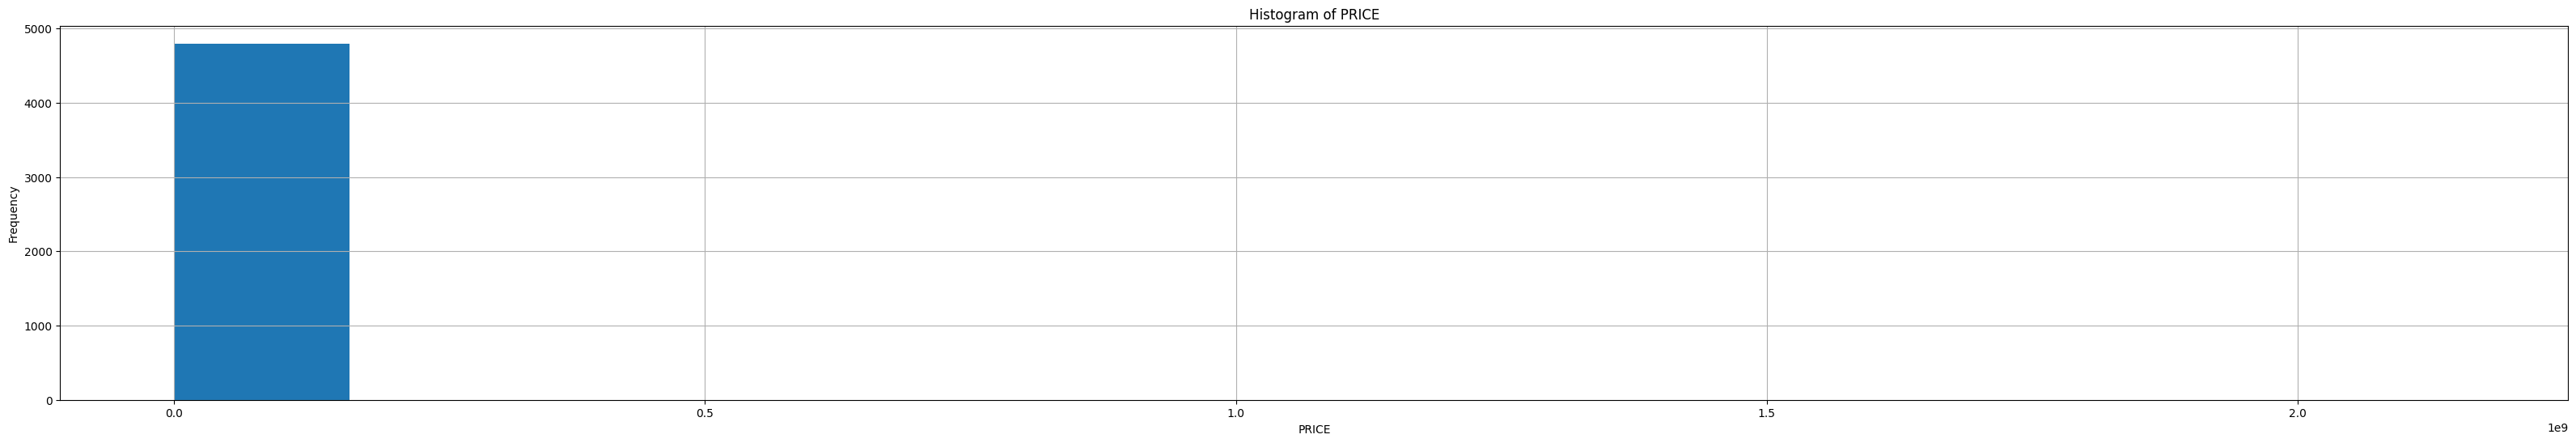

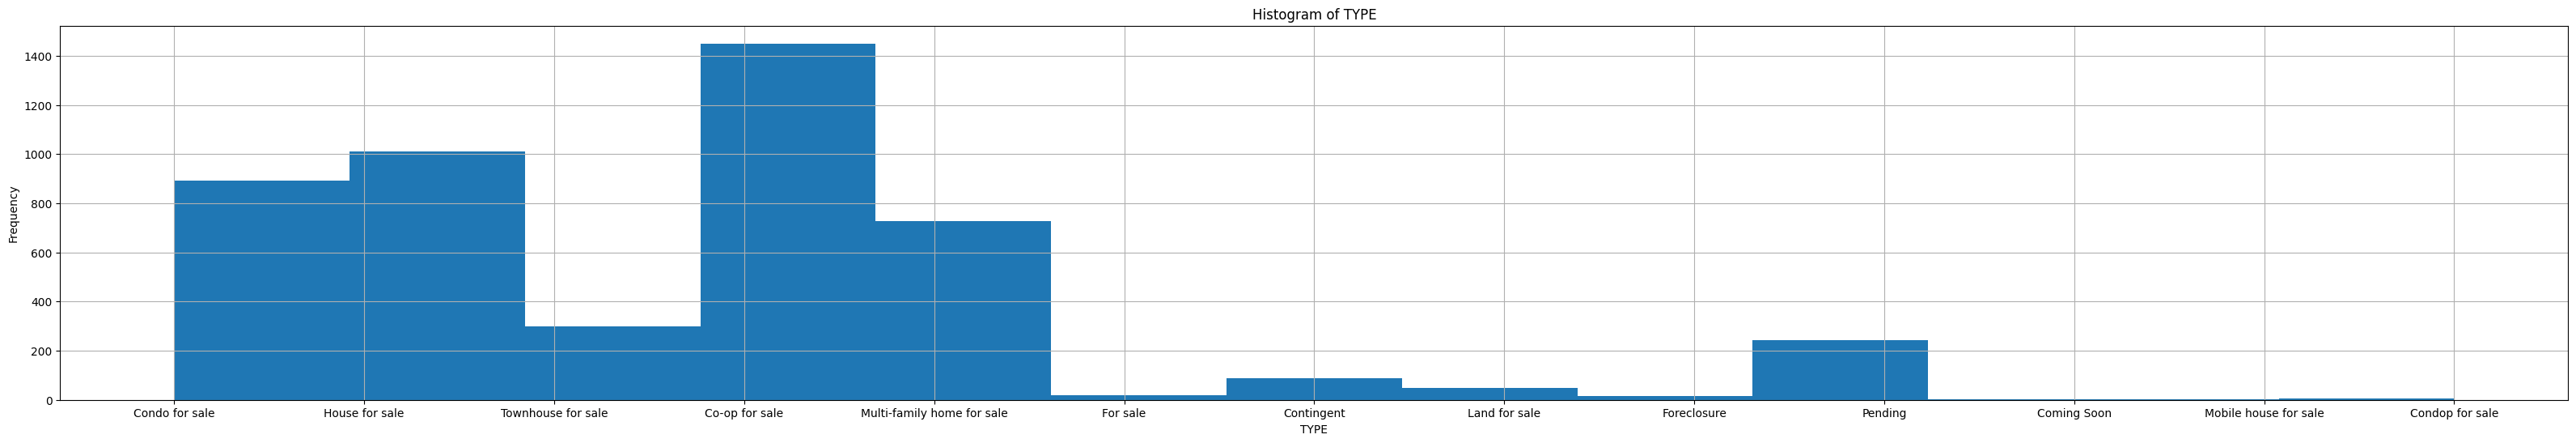

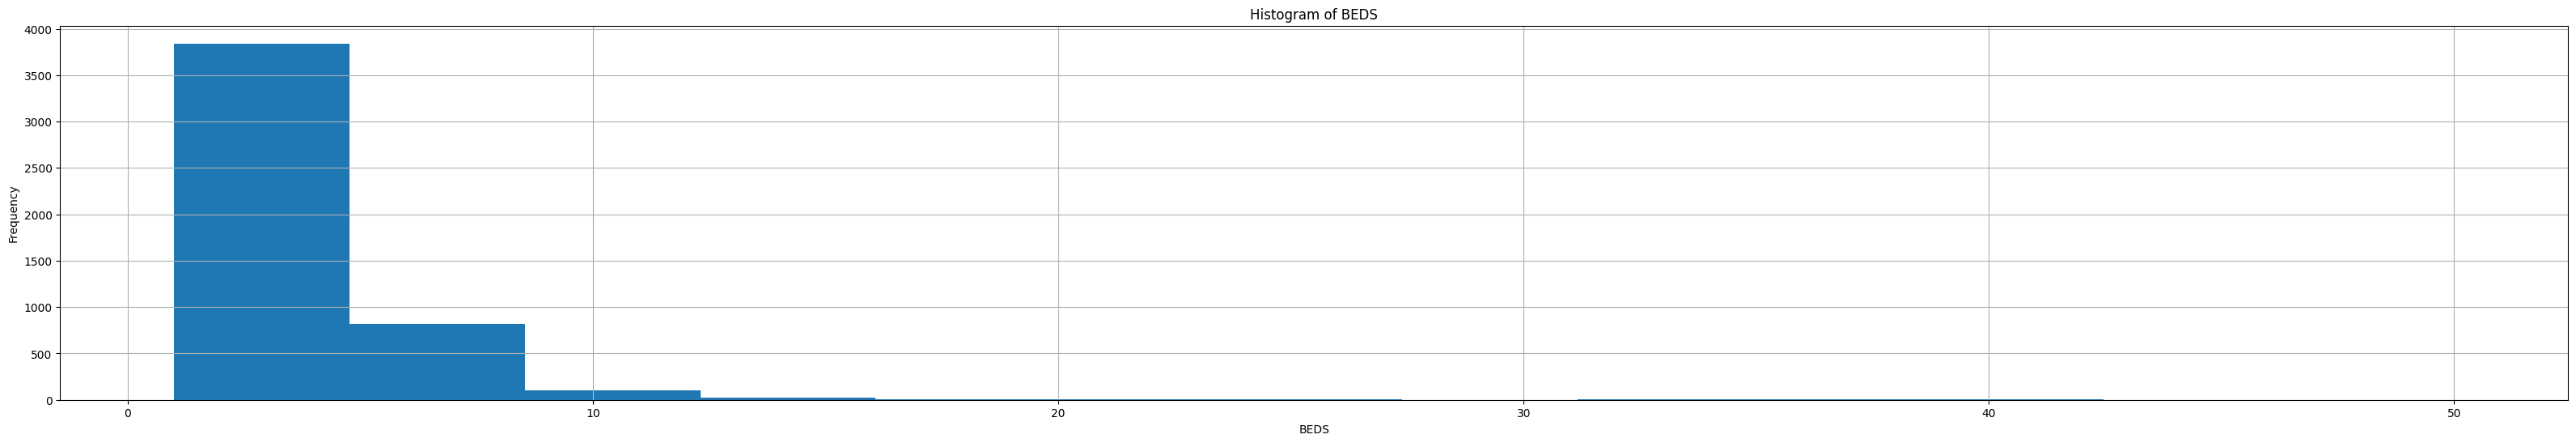

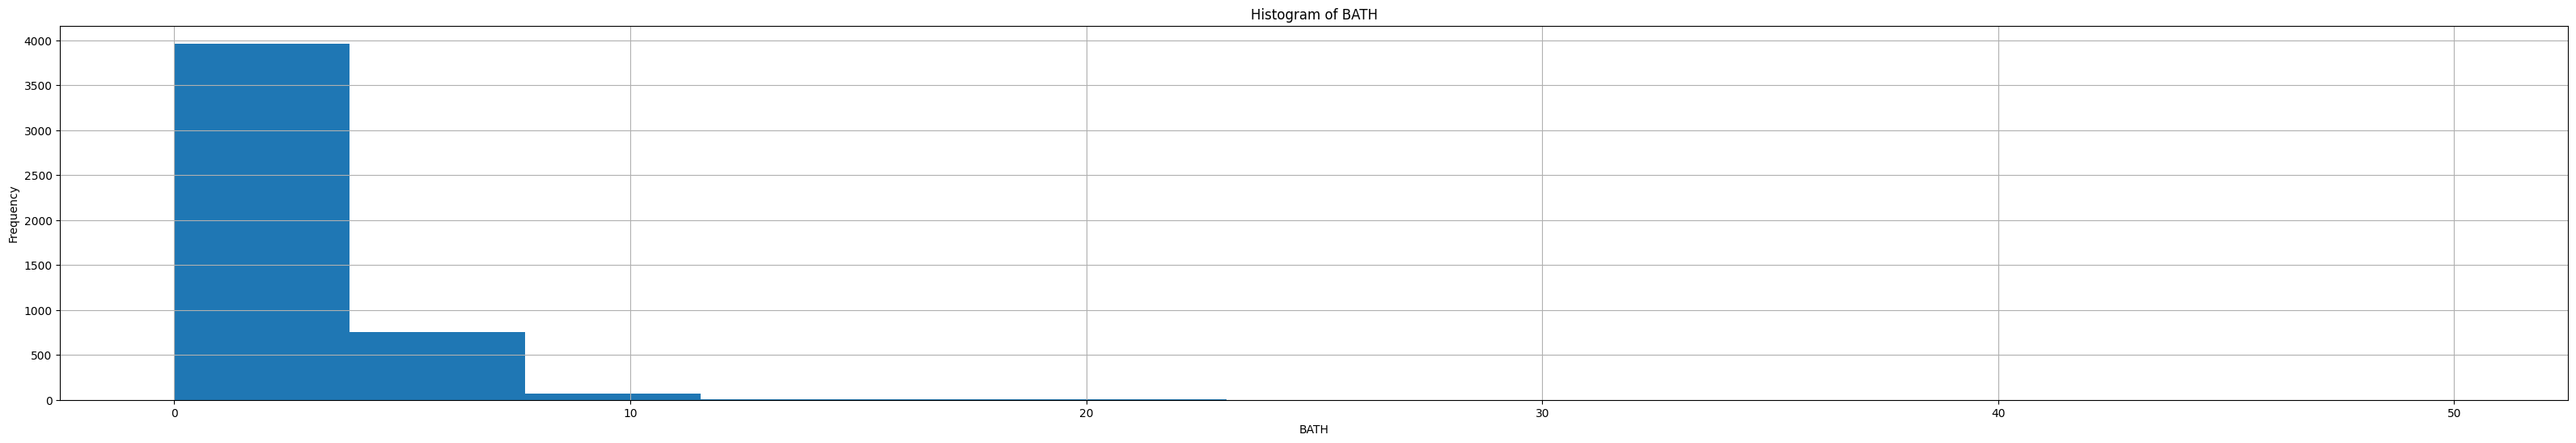

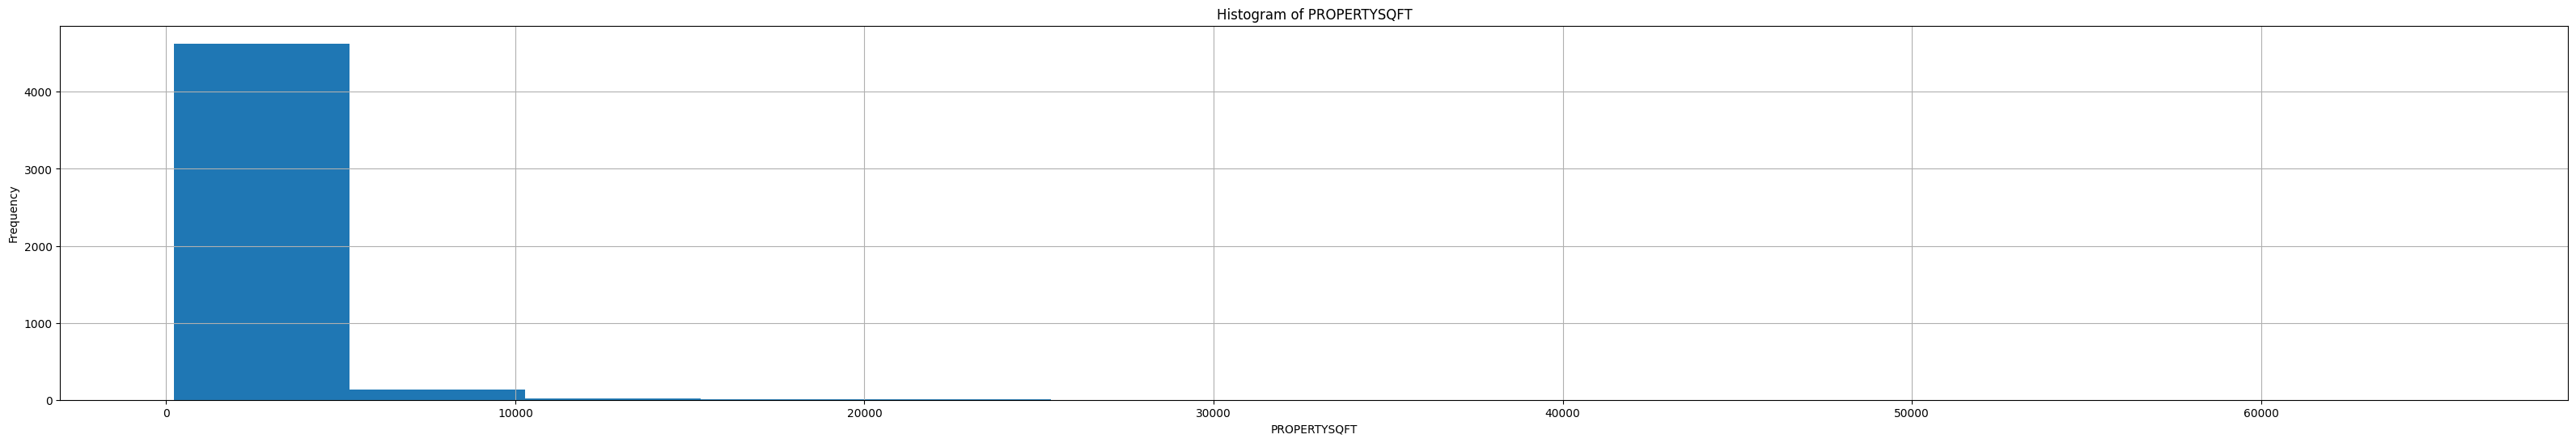

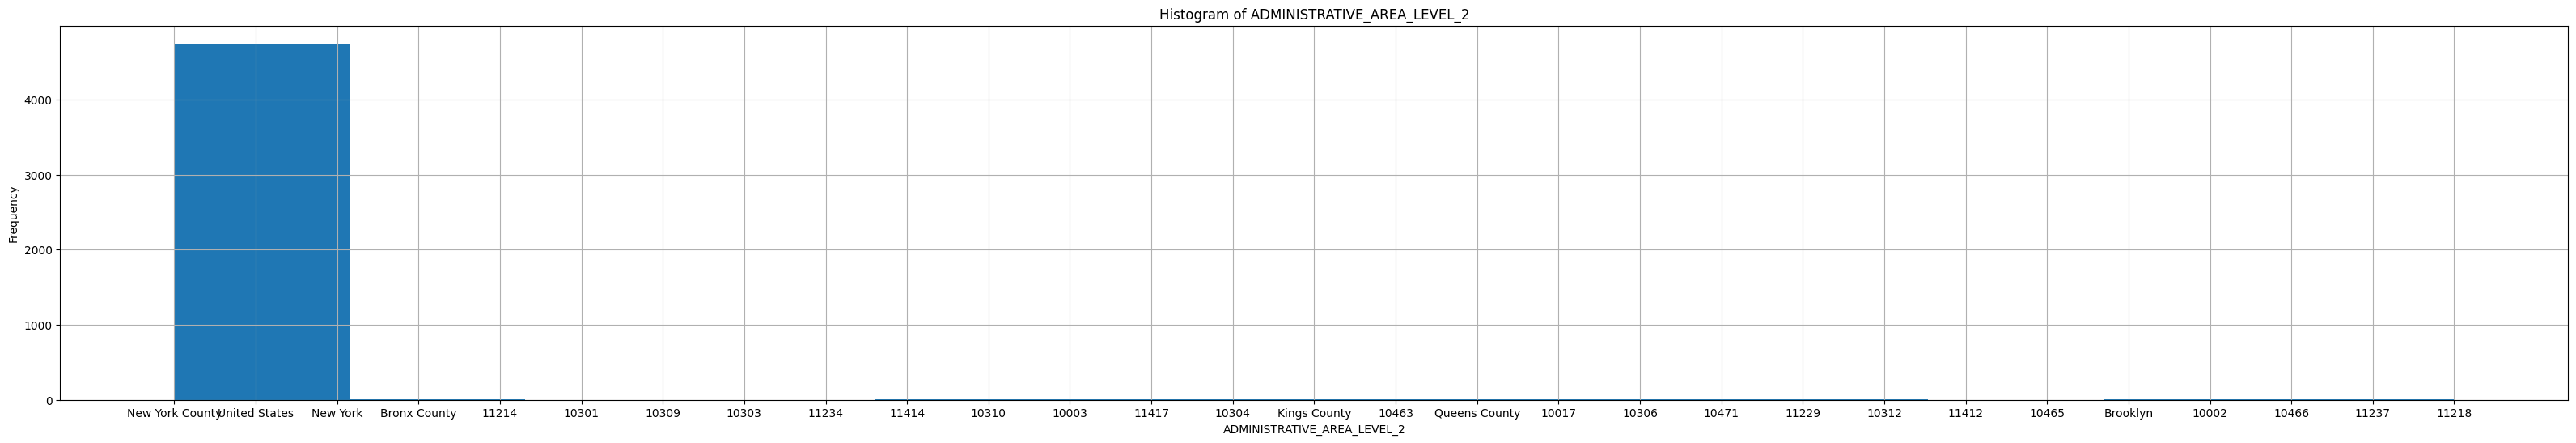

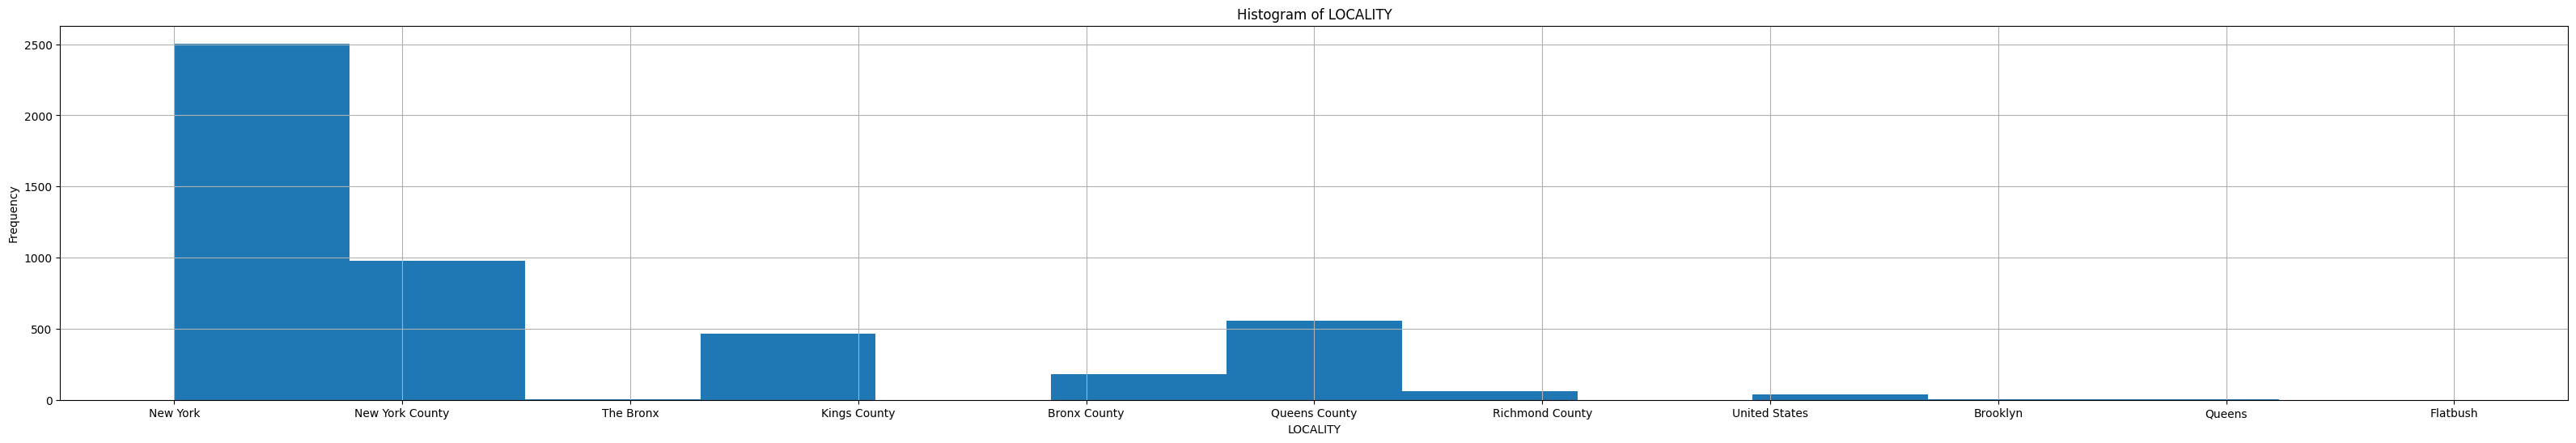

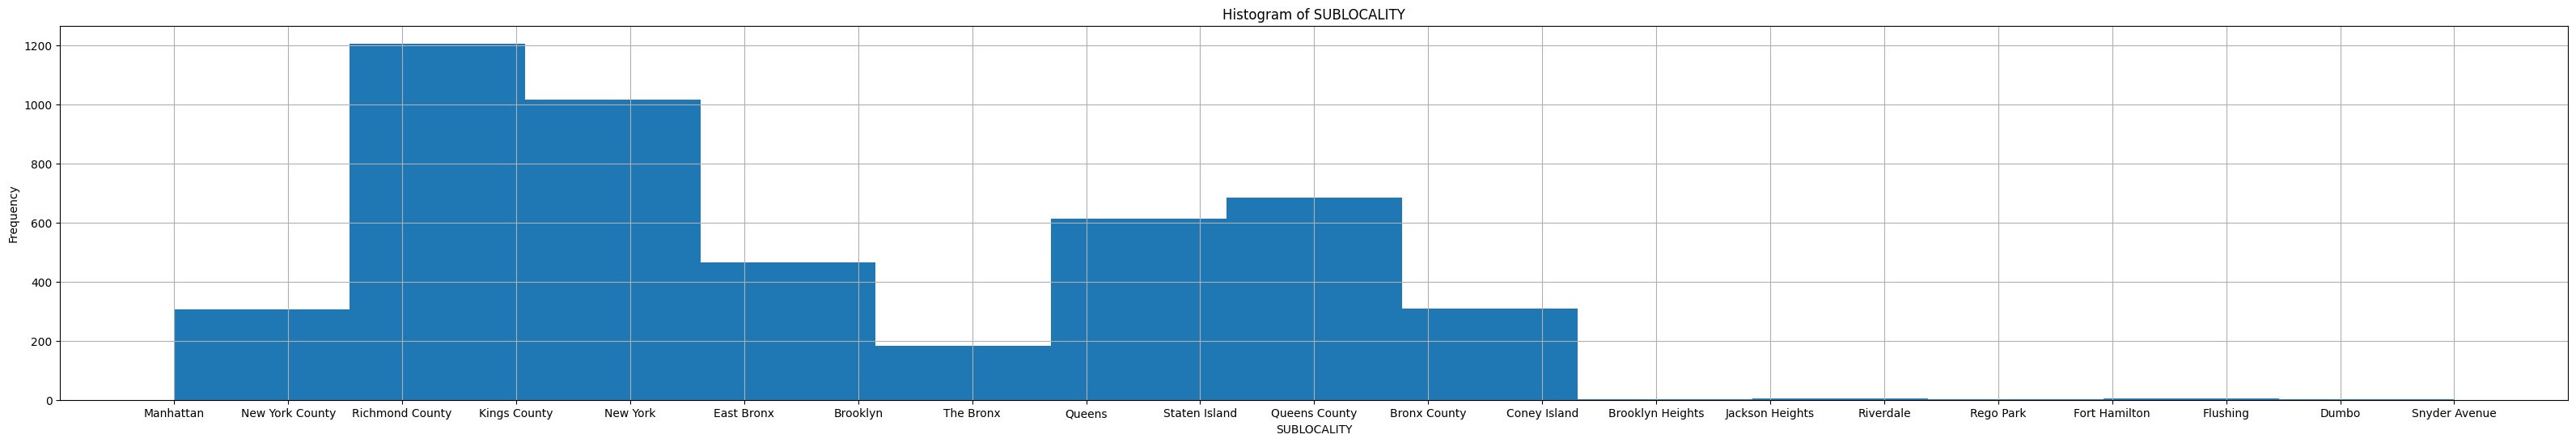

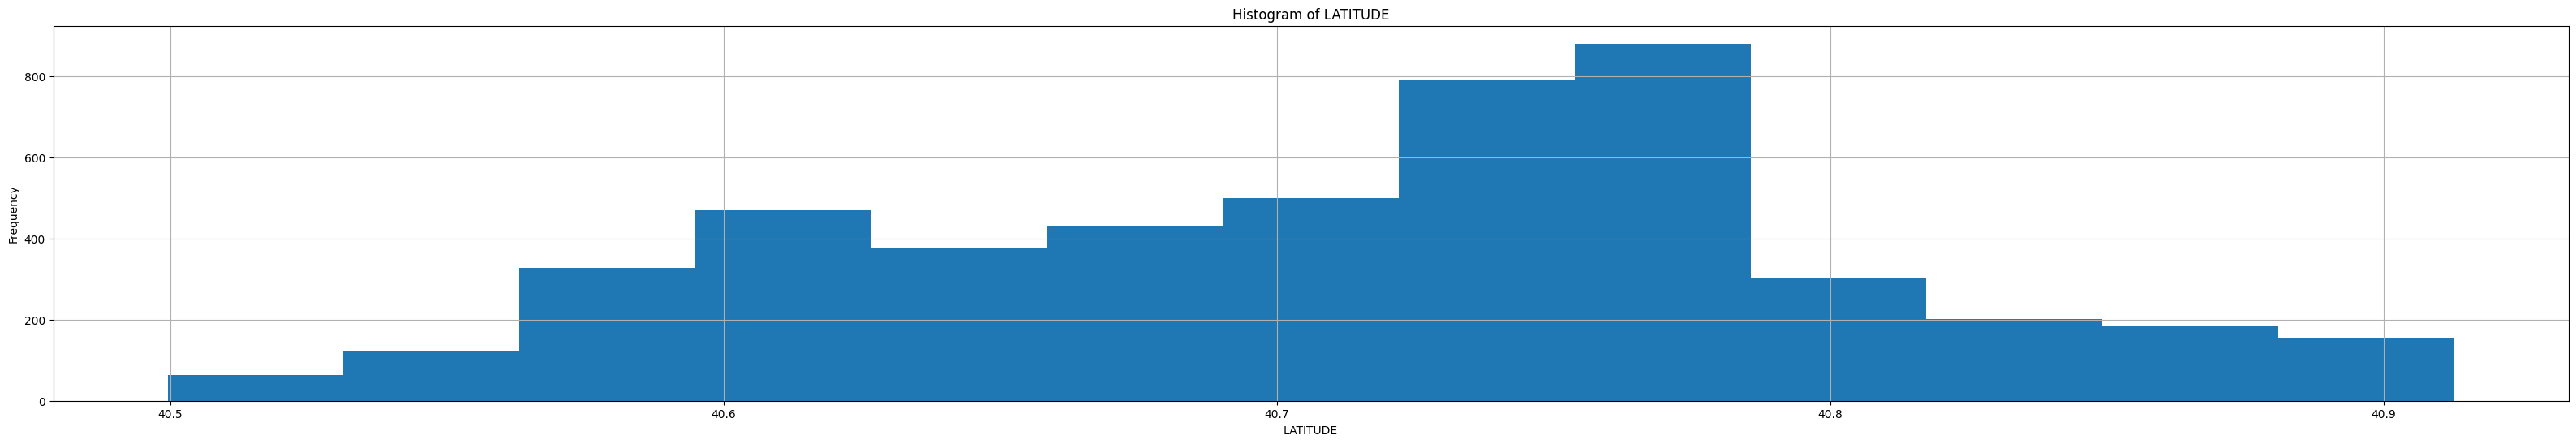

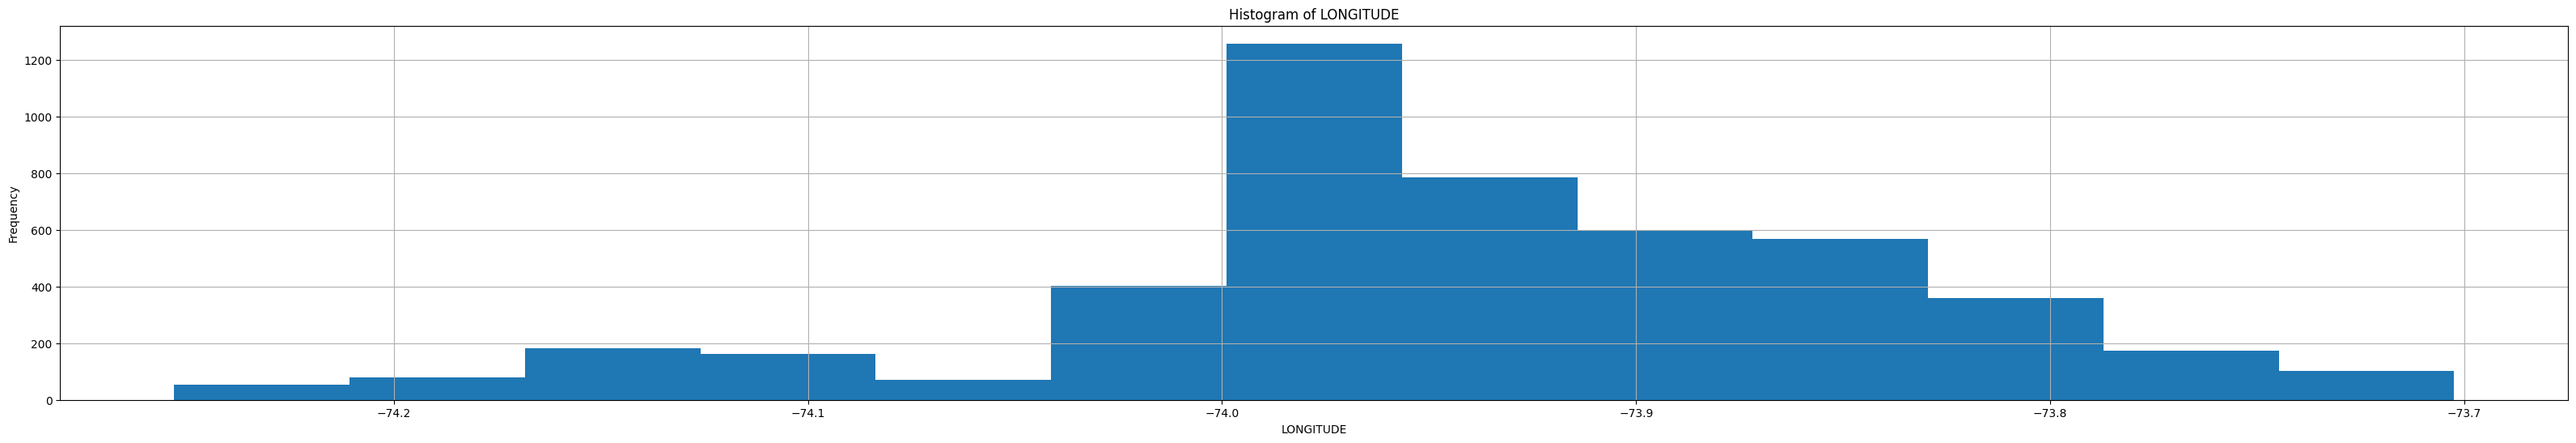

In [6]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the specified features
features = ['PRICE', 'TYPE', 'BEDS', 'BATH', 'PROPERTYSQFT',
          'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'LATITUDE', 'LONGITUDE']

# Setting the number of bins
num_bins = 13

# Plotting histograms for each feature
for feature in features:
    plt.figure(figsize=(40, 6))  # Adjust figure size if needed
    plt.hist(df[feature], bins=num_bins)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.grid(True)  # Add grid for better readability
    plt.show()


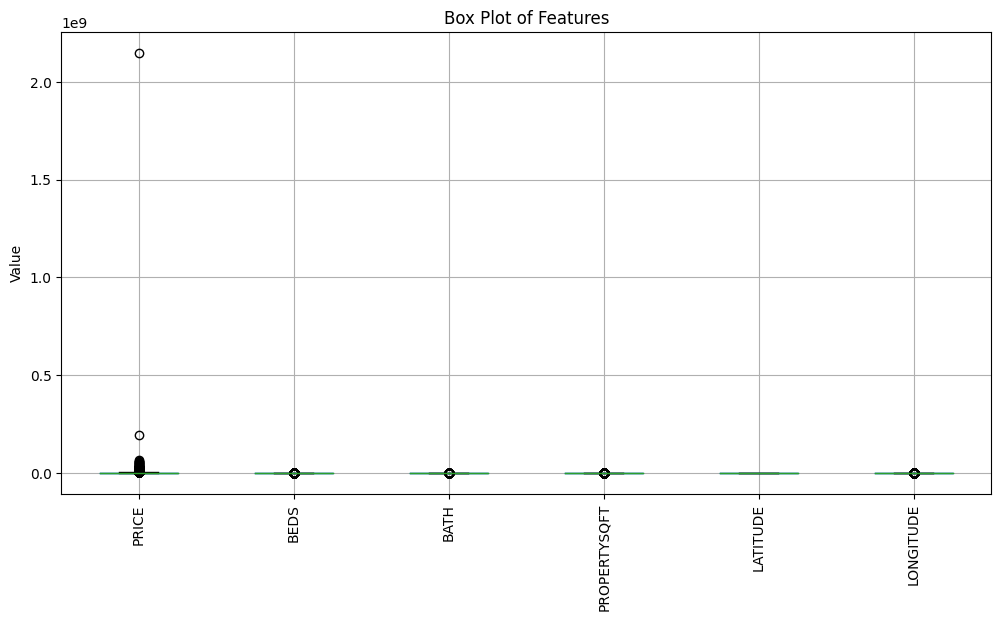

In [7]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the specified features
features = ['PRICE', 'BROKERTITLE', 'TYPE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'ADDRESS',
            'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY',
            'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE']

# Create a box plot for each feature
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
df[features].boxplot()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Box Plot of Features')
plt.ylabel('Value')
plt.grid(True)  # Add grid for better readability
plt.show()


In [8]:
import plotly.express as px
scatter_plot_multicolor_log = px.scatter(df, x='PROPERTYSQFT', y='PRICE', color='TYPE',
                                          title='Price vs. Property Square Footage (Logarithmic Scale)',
                                          labels={'PROPERTYSQFT': 'Property Square Footage', 'PRICE': 'Price', 'TYPE': 'House Type'},
                                          log_x=True, log_y=True)
scatter_plot_multicolor_log.show()

In [9]:
box_plot_log = px.box(df, x='TYPE', y='PRICE', color='TYPE' ,title='Price Distribution by House Type (Logarithmic Scale)',
                      labels={'TYPE': 'House Type', 'PRICE': 'Price'},
                      log_y=True)
box_plot_log.show()

In [10]:
scatter_3d_multicolor = px.scatter_3d(df, x='BEDS', y='BATH', z='PRICE', title='Price vs. Bedrooms vs. Bathrooms',
                                       labels={'BEDS': 'Bedrooms', 'BATH': 'Bathrooms', 'PRICE': 'Price'},
                                       color='PRICE')
scatter_3d_multicolor.show()

In [11]:
sunburst_chart = px.sunburst(df, path=['STATE', 'LOCALITY', 'SUBLOCALITY'], title='Categorization of Houses')
sunburst_chart.show()

# Data Preprocessing

In [12]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [13]:
df.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [14]:
# Counting the occurrences of each broker title
broker_counts = df['BROKERTITLE'].value_counts()

# Identifying the top 10 brokers
top_brokers = broker_counts.nlargest(10).index

# Replacing all other broker titles with 'Other'
df['BROKERTITLE_REDUCED'] = df['BROKERTITLE'].apply(lambda x: x if x in top_brokers else 'Other')

df.drop(['BROKERTITLE'],axis=1,inplace=True)

# Checking the modification
print(df['BROKERTITLE_REDUCED'].value_counts())

BROKERTITLE_REDUCED
Other                                                                         3677
Brokered by COMPASS                                                            456
Brokered by Douglas Elliman - 575 Madison Ave                                  110
Brokered by Brown Harris Stevens                                                93
Brokered by Corcoran East Side                                                  91
Brokered by RE MAX Edge                                                         79
Brokered by Winzone Realty Inc                                                  68
Brokered by Sotheby's International Realty - East Side Manhattan Brokerage      62
Brokered by E Realty International Corp                                         59
Brokered by Serhant                                                             54
Brokered by RE MAX Real Estate Professionals                                    52
Name: count, dtype: int64


### Now for TYPE Column

In [15]:
# Checking unique values in the "TYPE" column
type_unique_values = df['TYPE'].unique()
type_unique_values

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale', 'For sale',
       'Contingent', 'Land for sale', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house for sale', 'Condop for sale'],
      dtype=object)

### Now for address column

### There is a very high cardinality in this column so we are going to drop it

In [16]:
df.drop(['ADDRESS'],axis=1,inplace=True)

### Now for STATE column

In [17]:
print(df['STATE'].value_counts().to_string())

STATE
Brooklyn, NY 11235                     102
Brooklyn, NY 11209                      94
Forest Hills, NY 11375                  91
Brooklyn, NY 11234                      90
Staten Island, NY 10314                 86
Bronx, NY 10463                         79
Staten Island, NY 10312                 73
Staten Island, NY 10306                 69
Brooklyn, NY 11201                      60
Rego Park, NY 11374                     58
Staten Island, NY 10301                 57
Bronx, NY 10471                         57
Jackson Heights, NY 11372               57
Staten Island, NY 10304                 56
New York, NY 10023                      55
New York, NY 10024                      54
Brooklyn, NY 11215                      53
Bayside, NY 11360                       52
Brooklyn, NY 11229                      52
New York, NY 10021                      48
New York, NY 10128                      48
New York, NY 10022                      48
New York, NY 10065                      47
Bronx

In [18]:
# List of New York City boroughs
nyc_boroughs = ["FLoral Park","East Elmhurst","College Point","Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island",'Fresh Meadows',"Bellerose","Glen Oaks","Hollis","Jamaica","Rosedale","Douglaston","Astoria","Averne","Queens","Forest Hills"]

# Function to find the borough name in the given text
def extract_borough(text):
    # Normalize text to handle different case entries
    text = text.lower()
    # Search for any borough name present in the text
    for borough in nyc_boroughs:
        if borough.lower() in text:
            return borough
    return "Other"  # Return 'Unknown' if no borough is found

# Apply the function to the 'STATE' column to create a new column 'Borough'
df['Borough'] = df['STATE'].apply(extract_borough)

# Verify the results by showing the unique values in the new column
unique_boroughs = df['Borough'].unique()
print(unique_boroughs)

df['Borough'].value_counts()

['Other' 'Staten Island' 'Manhattan' 'Brooklyn' 'Bronx' 'Forest Hills'
 'Queens' 'Jamaica' 'Rosedale' 'Bellerose' 'Astoria' 'FLoral Park'
 'Fresh Meadows' 'East Elmhurst' 'College Point' 'Hollis' 'Glen Oaks'
 'Douglaston']


Borough
Other            1697
Brooklyn         1184
Staten Island     544
Bronx             496
Manhattan         416
Queens            103
Forest Hills       91
Jamaica            82
Astoria            34
FLoral Park        30
East Elmhurst      28
Fresh Meadows      26
College Point      22
Hollis             11
Bellerose          11
Glen Oaks          10
Douglaston          9
Rosedale            7
Name: count, dtype: int64

### Have listed all the boroughs that are quite common in the state column and made a new column with just the boroughs and rest keeping as unkown

### Now for extracting postal codes from State column

In [19]:
# Function to find the postal code in the given text
import re
def extract_postal_code(text):
    match = re.search(r'\b\d{5}\b', text)
    return match.group(0) if match else "Unknown"

# Apply the function to the 'STATE' column to create a new column 'Postal_Code'
df['Postal_Code'] = df['STATE'].apply(extract_postal_code)

# Verify the results by showing the unique values in the new column
unique_postal_codes = df['Postal_Code'].unique()
unique_postal_codes

array(['10022', '10019', '10312', '10065', '11238', '10027', '10304',
       '10473', '11230', '10451', '10303', '11372', '11373', '10014',
       '11377', '11209', '10471', '11374', '10301', '11375', '10465',
       '10307', '11435', '11214', '10314', '11207', '11219', '11355',
       '11249', '10453', '11204', '11421', '10012', '11358', '11419',
       '10013', '11231', '11217', '10023', '11235', '10002', '11218',
       '10306', '10308', '10075', '11221', '11237', '11357', '10305',
       '11385', '10466', '11422', '10128', '10010', '11436', '11234',
       '10025', '11210', '10021', '10463', '10469', '10470', '10309',
       '11229', '11215', '10029', '10031', '11228', '10467', '11208',
       '11417', '11413', '10032', '11691', '11426', '10007', '11360',
       '11103', '11005', '11365', '10458', '10024', '11697', '10452',
       '11414', '11411', '11224', '11694', '10280', '11201', '11369',
       '11362', '10474', '11354', '11415', '10038', '11105', '11216',
       '10302', '113

#### now droppig the column MAIN_ADDRESS and going ahead with the extraction of ADMINISTRATIVE_AREA_LEVEL_2 column

The "ADMINISTRATIVE_AREA_LEVEL_2" column in the dataset contains 29 unique values. These values appear to be a mix of county names, postal codes, parts of New York City like "Brooklyn," and some general entries like "United States. so lets drop that as well

In [20]:
df.drop(['STATE','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2'],axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TYPE                 4801 non-null   object 
 1   PRICE                4801 non-null   int64  
 2   BEDS                 4801 non-null   int64  
 3   BATH                 4801 non-null   float64
 4   PROPERTYSQFT         4801 non-null   float64
 5   LOCALITY             4801 non-null   object 
 6   SUBLOCALITY          4801 non-null   object 
 7   STREET_NAME          4801 non-null   object 
 8   LONG_NAME            4801 non-null   object 
 9   FORMATTED_ADDRESS    4801 non-null   object 
 10  LATITUDE             4801 non-null   float64
 11  LONGITUDE            4801 non-null   float64
 12  BROKERTITLE_REDUCED  4801 non-null   object 
 13  Borough              4801 non-null   object 
 14  Postal_Code          4801 non-null   object 
dtypes: float64(4), int64(2), object(9)
mem

### Now for localities

In [22]:
# Checking unique values and their frequency in the 'LOCALITY' column
locality_counts = df['LOCALITY'].value_counts()
locality_counts

LOCALITY
New York           2505
New York County     979
Queens County       557
Kings County        464
Bronx County        182
Richmond County      59
United States        37
Brooklyn              6
Queens                6
The Bronx             5
Flatbush              1
Name: count, dtype: int64

#### already categorical not much needed

### the next column SUBLOCALITY has already captured with some prior info so lets drop it

In [23]:
df.drop(['SUBLOCALITY'],axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TYPE                 4801 non-null   object 
 1   PRICE                4801 non-null   int64  
 2   BEDS                 4801 non-null   int64  
 3   BATH                 4801 non-null   float64
 4   PROPERTYSQFT         4801 non-null   float64
 5   LOCALITY             4801 non-null   object 
 6   STREET_NAME          4801 non-null   object 
 7   LONG_NAME            4801 non-null   object 
 8   FORMATTED_ADDRESS    4801 non-null   object 
 9   LATITUDE             4801 non-null   float64
 10  LONGITUDE            4801 non-null   float64
 11  BROKERTITLE_REDUCED  4801 non-null   object 
 12  Borough              4801 non-null   object 
 13  Postal_Code          4801 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 525.2+ KB


In [25]:
print(df['STREET_NAME'].value_counts().to_string())

STREET_NAME
Manhattan                              979
Brooklyn                               727
Queens                                 684
Staten Island                          480
The Bronx                              310
New York                               285
Flushing                               139
Forest Hills                            62
Bayside                                 42
Jackson Heights                         42
Jamaica                                 40
Spuyten Duyvil                          36
Rego Park                               35
Sheepshead Bay                          34
Bay Ridge                               30
East Bronx                              30
Fort Hamilton                           28
Elmhurst                                24
North Riverdale                         23
Gravesend                               22
Astoria                                 21
Park Slope                              21
Brighton Beach                          21

In [26]:
# keep the top 6 street names with highest value counts and rest as other

top_street_names = df['STREET_NAME'].value_counts().nlargest(6).index

df['STREET_NAME_REDUCED'] = df['STREET_NAME'].apply(lambda x: x if x in top_street_names else 'Other')

df.drop(['STREET_NAME'],axis=1,inplace=True)

In [27]:
df['STREET_NAME_REDUCED'].value_counts()

STREET_NAME_REDUCED
Other            1336
Manhattan         979
Brooklyn          727
Queens            684
Staten Island     480
The Bronx         310
New York          285
Name: count, dtype: int64

Done with Street names

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TYPE                 4801 non-null   object 
 1   PRICE                4801 non-null   int64  
 2   BEDS                 4801 non-null   int64  
 3   BATH                 4801 non-null   float64
 4   PROPERTYSQFT         4801 non-null   float64
 5   LOCALITY             4801 non-null   object 
 6   LONG_NAME            4801 non-null   object 
 7   FORMATTED_ADDRESS    4801 non-null   object 
 8   LATITUDE             4801 non-null   float64
 9   LONGITUDE            4801 non-null   float64
 10  BROKERTITLE_REDUCED  4801 non-null   object 
 11  Borough              4801 non-null   object 
 12  Postal_Code          4801 non-null   object 
 13  STREET_NAME_REDUCED  4801 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 525.2+ KB


In [29]:
df['LONG_NAME'].value_counts()

LONG_NAME
2                         20
200                       19
100                       19
40                        16
Amboy Road                15
                          ..
Powells Cove Boulevard     1
579                        1
86-2                       1
36th Avenue                1
2351                       1
Name: count, Length: 2731, dtype: int64

dropping it due to high cardinality and very low relevance

In [30]:
df.drop(['LONG_NAME'],axis=1,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TYPE                 4801 non-null   object 
 1   PRICE                4801 non-null   int64  
 2   BEDS                 4801 non-null   int64  
 3   BATH                 4801 non-null   float64
 4   PROPERTYSQFT         4801 non-null   float64
 5   LOCALITY             4801 non-null   object 
 6   FORMATTED_ADDRESS    4801 non-null   object 
 7   LATITUDE             4801 non-null   float64
 8   LONGITUDE            4801 non-null   float64
 9   BROKERTITLE_REDUCED  4801 non-null   object 
 10  Borough              4801 non-null   object 
 11  Postal_Code          4801 non-null   object 
 12  STREET_NAME_REDUCED  4801 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 487.7+ KB


In [32]:
df['FORMATTED_ADDRESS'].value_counts()

FORMATTED_ADDRESS
61-20 Grand Central Pkwy, Forest Hills, NY 11375, USA    4
856 Washington Ave #6c, Brooklyn, NY 11238, USA          3
39 W 23rd St, New York, NY 10010, USA                    3
218 W 103rd St, New York, NY 10025, USA                  3
46 Laight St, New York, NY 10013, USA                    3
                                                        ..
134-25 241st St, Jamaica, NY 11422, USA                  1
86-2 Dumont Ave #1b, Ozone Park, NY 11417, USA           1
579 W 215th St #9d, New York, NY 10034, USA              1
150-123 Powells Cove Blvd, Whitestone, NY 11357, USA     1
460 Neptune Ave #14a, Brooklyn, NY 11224, USA            1
Name: count, Length: 4550, dtype: int64

dropping it out as well

In [33]:
df.drop(['FORMATTED_ADDRESS'],axis=1,inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TYPE                 4801 non-null   object 
 1   PRICE                4801 non-null   int64  
 2   BEDS                 4801 non-null   int64  
 3   BATH                 4801 non-null   float64
 4   PROPERTYSQFT         4801 non-null   float64
 5   LOCALITY             4801 non-null   object 
 6   LATITUDE             4801 non-null   float64
 7   LONGITUDE            4801 non-null   float64
 8   BROKERTITLE_REDUCED  4801 non-null   object 
 9   Borough              4801 non-null   object 
 10  Postal_Code          4801 non-null   object 
 11  STREET_NAME_REDUCED  4801 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 450.2+ KB


keep the Latitude and longitude will provide specific geographic locations that allow the model to capture spatial relationships. Properties that are geographically close to each other tend to have similar prices due to shared environmental and economic factors.

<Axes: ylabel='PRICE'>

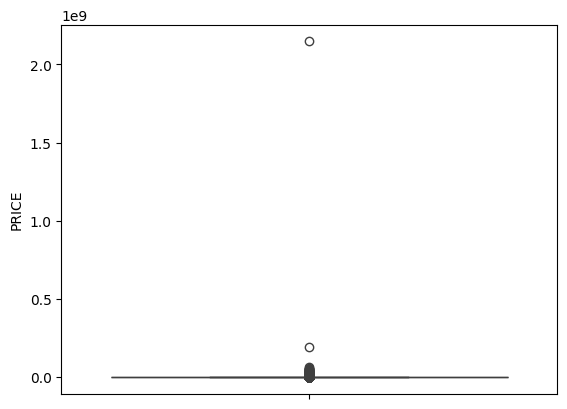

In [35]:
import seaborn as sns
sns.boxplot(df['PRICE'])

In [36]:
df[df['PRICE']>10000000]

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,LATITUDE,LONGITUDE,BROKERTITLE_REDUCED,Borough,Postal_Code,STREET_NAME_REDUCED
1,Condo for sale,195000000,7,10.000000,17545.000000,New York,40.766393,-73.980991,Brokered by Serhant,Other,10019,New York
4,Townhouse for sale,55000000,7,2.373861,14175.000000,New York,40.767224,-73.969856,Brokered by Sotheby's International Realty - E...,Other,10065,New York
7,House for sale,16800000,8,16.000000,33000.000000,New York,40.595002,-74.106424,Other,Staten Island,10304,Staten Island
69,Townhouse for sale,65000000,3,2.373861,15200.000000,New York,40.776561,-73.963317,Brokered by Sotheby's International Realty - E...,Other,10075,New York
76,Condo for sale,31000000,3,4.000000,4492.000000,New York County,40.764953,-73.977568,Other,Other,10019,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...
4716,Condo for sale,15000000,2,2.000000,2625.000000,New York County,40.761506,-73.971800,Brokered by Sotheby's International Realty - E...,Other,10022,Manhattan
4722,Condo for sale,24500000,4,6.000000,5427.000000,New York County,40.767742,-73.970037,Brokered by COMPASS,Manhattan,10065,Manhattan
4733,House for sale,21000000,3,2.373861,2184.207862,New York,40.721386,-74.002106,Other,Other,10013,New York
4745,Townhouse for sale,10500000,7,10.000000,7040.000000,New York,40.787573,-73.972133,Brokered by Brown Harris Stevens,Manhattan,10024,New York


In [37]:
df.drop(df[df['PRICE']>10000000].index,inplace=True)

<Axes: ylabel='PRICE'>

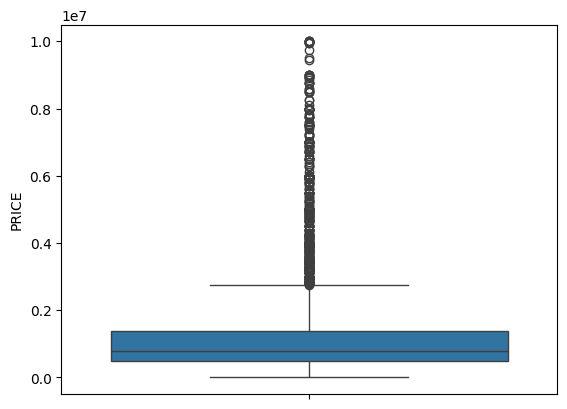

In [38]:
import seaborn as sns
sns.boxplot(df['PRICE'])

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['PRICE_standardized'] = scaler.fit_transform(df[['PRICE']])
sorted_df = df.sort_values(by='PRICE_standardized', ascending=False)
sorted_df = sorted_df[2:]

In [40]:
df.isnull().sum()

TYPE                   0
PRICE                  0
BEDS                   0
BATH                   0
PROPERTYSQFT           0
LOCALITY               0
LATITUDE               0
LONGITUDE              0
BROKERTITLE_REDUCED    0
Borough                0
Postal_Code            0
STREET_NAME_REDUCED    0
PRICE_standardized     0
dtype: int64

In [41]:
df.duplicated().sum()

207

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4437 entries, 0 to 4800
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TYPE                 4437 non-null   object 
 1   PRICE                4437 non-null   int64  
 2   BEDS                 4437 non-null   int64  
 3   BATH                 4437 non-null   float64
 4   PROPERTYSQFT         4437 non-null   float64
 5   LOCALITY             4437 non-null   object 
 6   LATITUDE             4437 non-null   float64
 7   LONGITUDE            4437 non-null   float64
 8   BROKERTITLE_REDUCED  4437 non-null   object 
 9   Borough              4437 non-null   object 
 10  Postal_Code          4437 non-null   object 
 11  STREET_NAME_REDUCED  4437 non-null   object 
 12  PRICE_standardized   4437 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 485.3+ KB


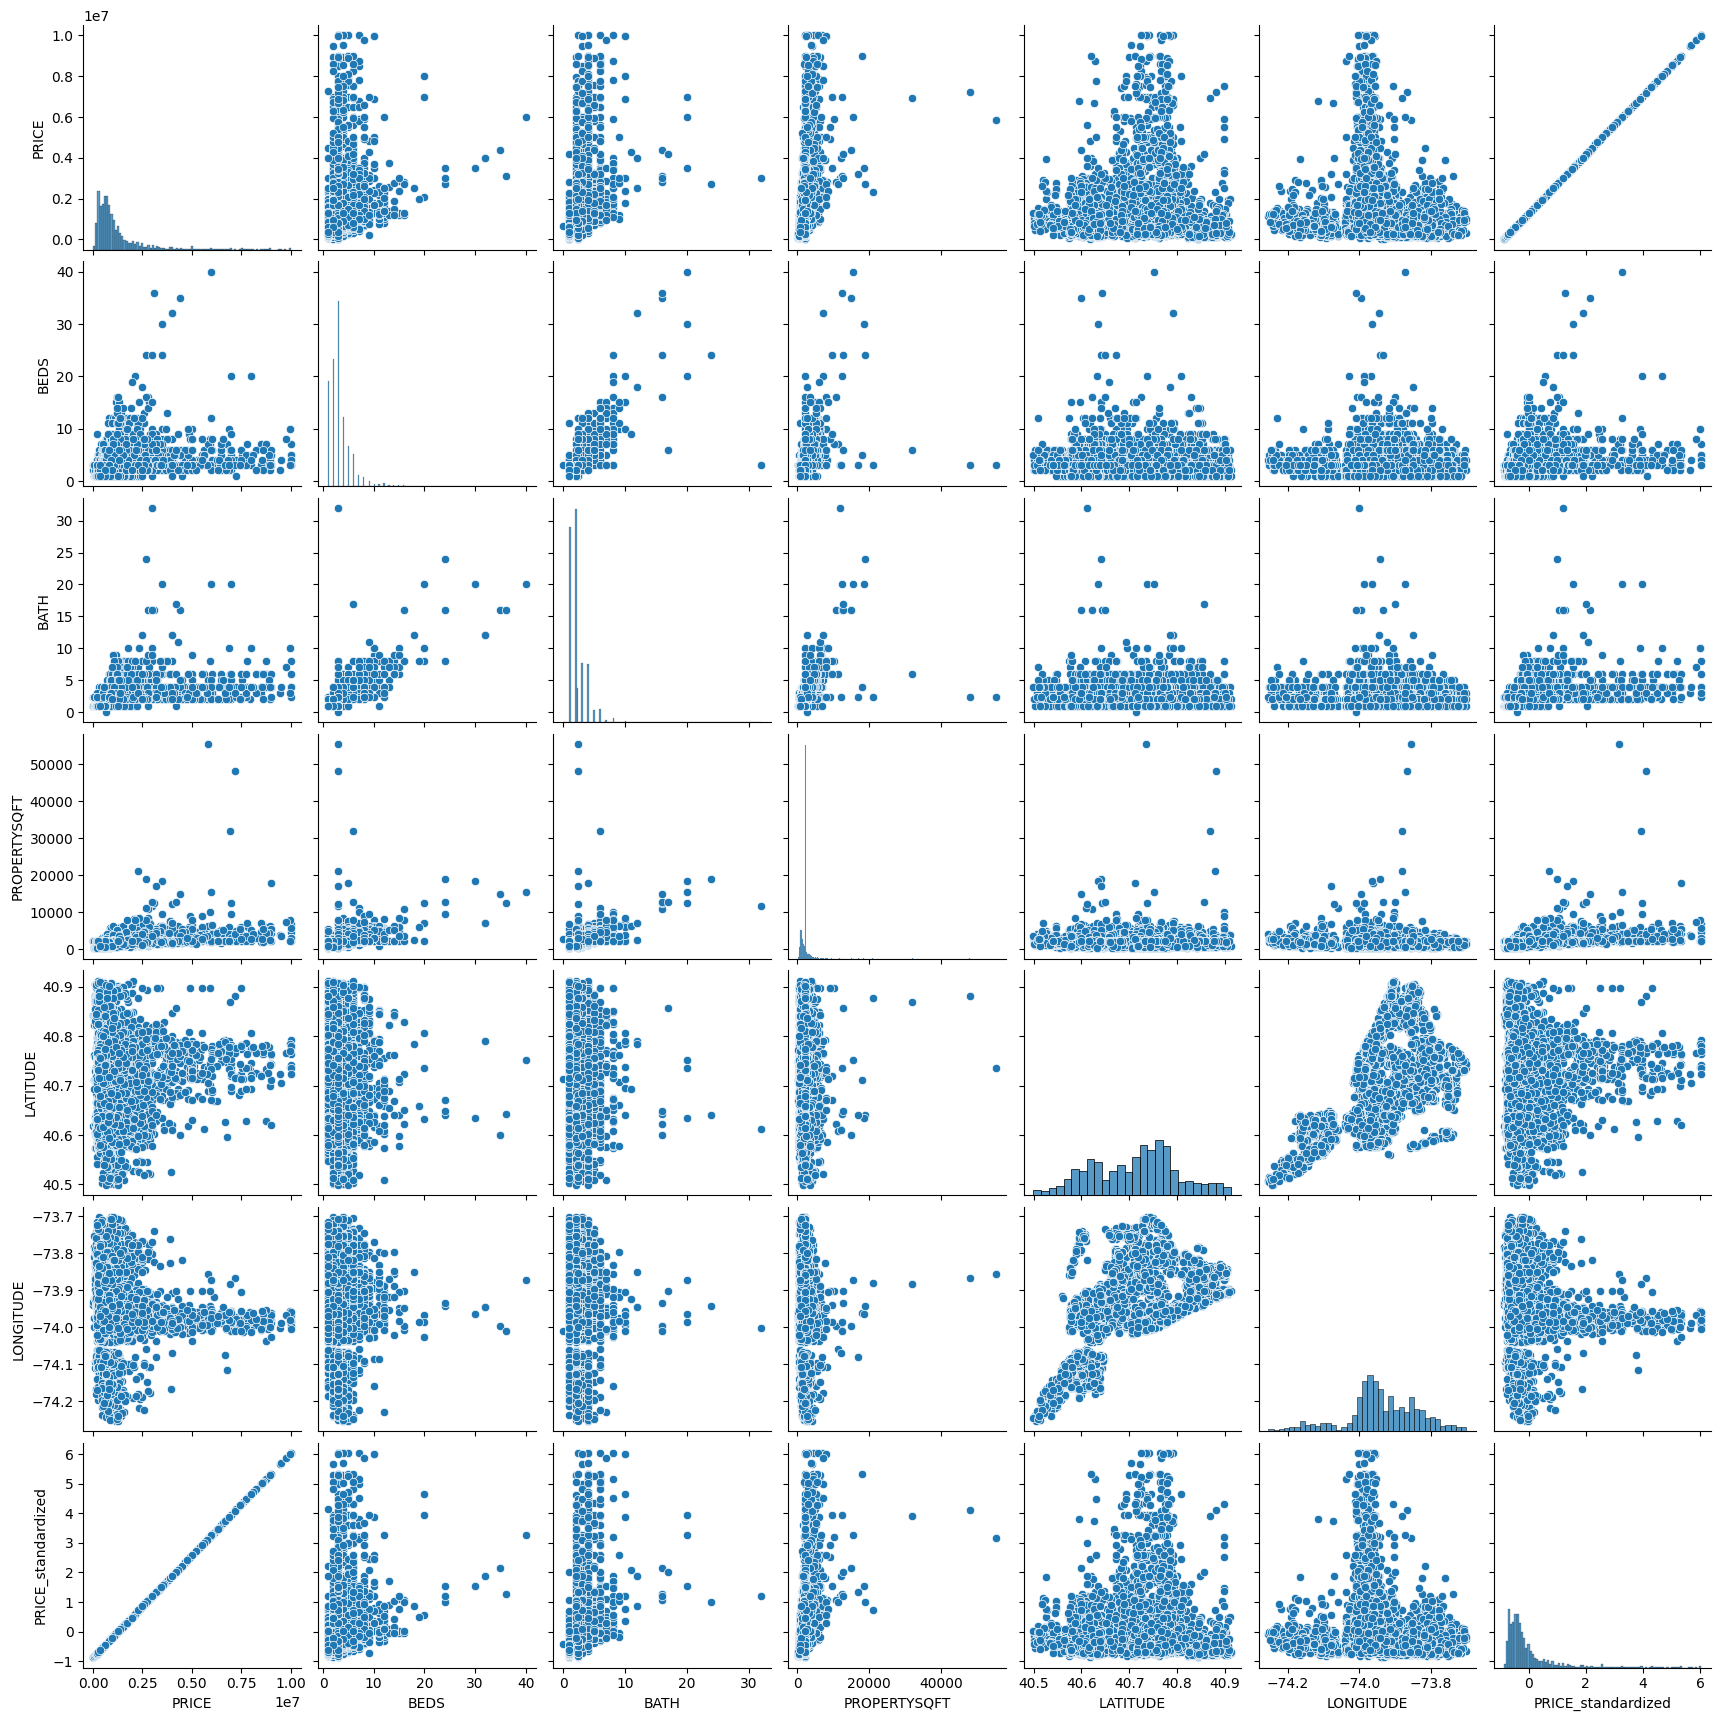

In [44]:
import seaborn as sns
ax = sns.pairplot(df)

In [45]:
from sklearn.preprocessing import OneHotEncoder
#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")

Encoded Employee data : 
         PRICE  BEDS  BATH  PROPERTYSQFT   LATITUDE  LONGITUDE  \
0     315000.0   2.0   2.0   1400.000000  40.761255 -73.974483   
2     260000.0   4.0   2.0   2015.000000  40.541805 -74.196109   
3      69000.0   3.0   1.0    445.000000  40.761398 -73.974613   
5     690000.0   5.0   2.0   4004.000000  40.674363 -73.958725   
6     899500.0   2.0   2.0   2184.207862  40.809448 -73.946777   
...        ...   ...   ...           ...        ...        ...   
4358       NaN   NaN   NaN           NaN        NaN        NaN   
4423       NaN   NaN   NaN           NaN        NaN        NaN   
4425       NaN   NaN   NaN           NaN        NaN        NaN   
4435       NaN   NaN   NaN           NaN        NaN        NaN   
4436       NaN   NaN   NaN           NaN        NaN        NaN   

      PRICE_standardized  TYPE_Co-op for sale  TYPE_Coming Soon  \
0              -0.658860                  0.0               0.0   
2              -0.696851                  0.0   

In [46]:
df_encoded

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,PRICE_standardized,TYPE_Co-op for sale,TYPE_Coming Soon,TYPE_Condo for sale,...,Postal_Code_11693,Postal_Code_11694,Postal_Code_11697,STREET_NAME_REDUCED_Brooklyn,STREET_NAME_REDUCED_Manhattan,STREET_NAME_REDUCED_New York,STREET_NAME_REDUCED_Other,STREET_NAME_REDUCED_Queens,STREET_NAME_REDUCED_Staten Island,STREET_NAME_REDUCED_The Bronx
0,315000.0,2.0,2.0,1400.000000,40.761255,-73.974483,-0.658860,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,260000.0,4.0,2.0,2015.000000,40.541805,-74.196109,-0.696851,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,69000.0,3.0,1.0,445.000000,40.761398,-73.974613,-0.828784,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,690000.0,5.0,2.0,4004.000000,40.674363,-73.958725,-0.399830,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,899500.0,2.0,2.0,2184.207862,40.809448,-73.946777,-0.255119,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
df_encoded.to_csv('Clean_Dataset.csv')

In [48]:
df_encoded.corr()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,PRICE_standardized,TYPE_Co-op for sale,TYPE_Coming Soon,TYPE_Condo for sale,...,Postal_Code_11693,Postal_Code_11694,Postal_Code_11697,STREET_NAME_REDUCED_Brooklyn,STREET_NAME_REDUCED_Manhattan,STREET_NAME_REDUCED_New York,STREET_NAME_REDUCED_Other,STREET_NAME_REDUCED_Queens,STREET_NAME_REDUCED_Staten Island,STREET_NAME_REDUCED_The Bronx
PRICE,1.000000,0.297968,0.464935,0.409209,0.060536,-0.138534,1.000000,0.016386,0.003853,0.009371,...,-0.004469,-0.027201,-0.013932,-0.015520,0.022051,0.007660,-0.005011,-0.008923,0.024718,-0.027287
BEDS,0.297968,1.000000,0.752210,0.450483,-0.067290,0.010162,0.297968,0.001108,0.001723,-0.008090,...,0.016892,-0.012391,-0.007145,-0.007179,0.010291,0.010206,-0.003034,-0.000788,-0.007269,0.001515
BATH,0.464935,0.752210,1.000000,0.506412,-0.072896,-0.053585,0.464935,0.001449,-0.001290,0.004245,...,0.025935,-0.020365,-0.010562,-0.012106,0.007410,0.022240,0.004302,0.000506,-0.000462,-0.019527
PROPERTYSQFT,0.409209,0.450483,0.506412,1.000000,0.014597,-0.014261,0.409209,-0.008293,-0.009444,0.009225,...,0.001284,-0.009442,-0.007375,-0.008277,0.014026,0.008099,-0.013607,-0.016328,0.024814,0.000946
LATITUDE,0.060536,-0.067290,-0.072896,0.014597,1.000000,0.523251,0.060536,0.016402,-0.004662,0.006345,...,-0.007287,-0.014270,0.009431,-0.000041,0.023314,0.013050,0.000188,-0.011575,-0.021509,-0.005096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STREET_NAME_REDUCED_New York,0.007660,0.010206,0.022240,0.008099,0.013050,0.013240,0.007660,-0.054150,-0.004277,-0.012808,...,-0.003024,-0.012855,-0.004277,-0.086288,-0.101252,1.000000,-0.128046,-0.083675,-0.068338,-0.053560
STREET_NAME_REDUCED_Other,-0.005011,-0.003034,0.004302,-0.013607,0.000188,0.003805,-0.005011,0.381434,-0.013500,0.219334,...,-0.009545,0.029913,-0.013500,-0.272326,-0.319550,-0.128046,1.000000,-0.264078,-0.215674,-0.169035
STREET_NAME_REDUCED_Queens,-0.008923,-0.000788,0.000506,-0.016328,-0.011575,-0.003165,-0.008923,-0.211864,-0.008822,-0.145359,...,0.036143,0.063562,0.051120,-0.177958,-0.208818,-0.083675,-0.264078,1.000000,-0.140938,-0.110460
STREET_NAME_REDUCED_Staten Island,0.024718,-0.007269,-0.000462,0.024814,-0.021509,-0.019765,0.024718,-0.226990,-0.007205,-0.138054,...,-0.005094,-0.021653,-0.007205,-0.145339,-0.170543,-0.068338,-0.215674,-0.140938,1.000000,-0.090213


In [49]:
df_encoded = df_encoded.dropna()

Results

Linear Regression:
r2_score is: 0.9999894669211138
mse is: 21922349.87992367
mae is: 374.94754782943437
---------------------------
Random Forest:
Best Score: 0.999933360540302
r2_score is: 0.9999297196013208
mse is: 146273611.5607828
mae is: 2488.587673763953
---------------------------
Gradient Boosting:
Best Score: 0.9999503827507237
r2_score is: 0.9999743582067939
mse is: 53367905.840446256
mae is: 1709.9998957167797
---------------------------
Decision Tree:
Best Score: 0.9999013227116699
r2_score is: 0.999889479979992
mse is: 230023773.0598422
mae is: 2909.179222357232
---------------------------
HistGradient Boosting:
Best Score: 0.998965586680273
r2_score is: 0.9990238040533536
mse is: 2031742980.837236
mae is: 15366.068363230464
---------------------------


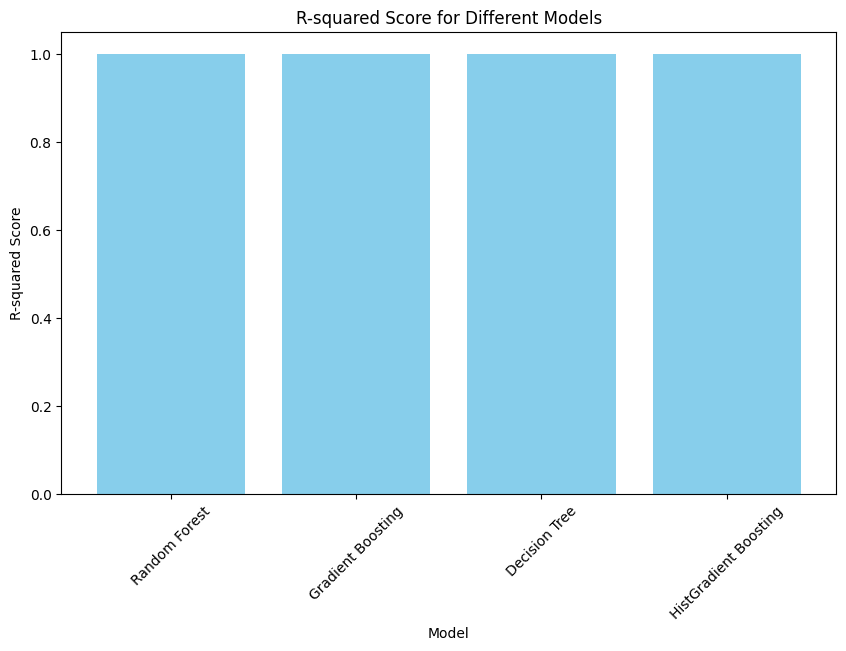

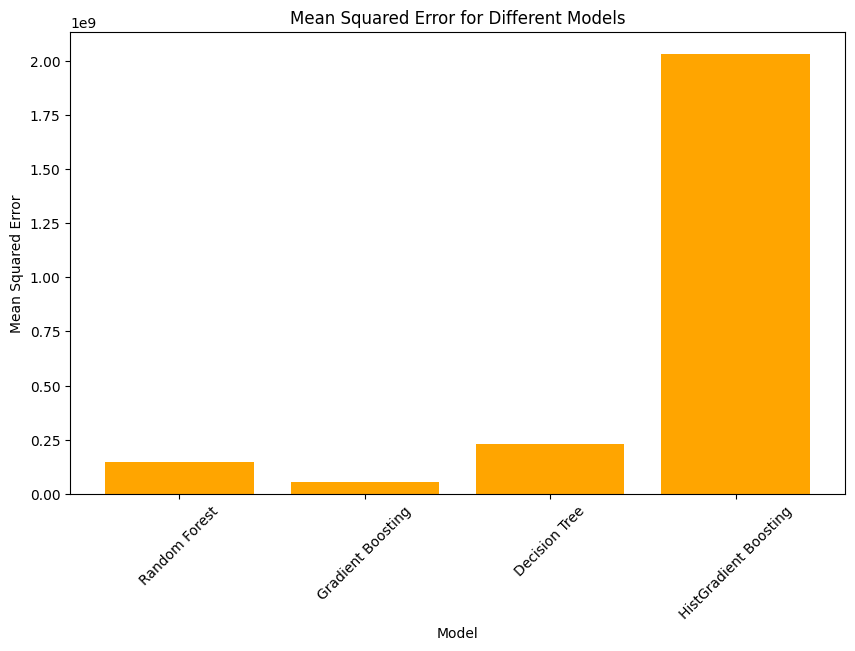

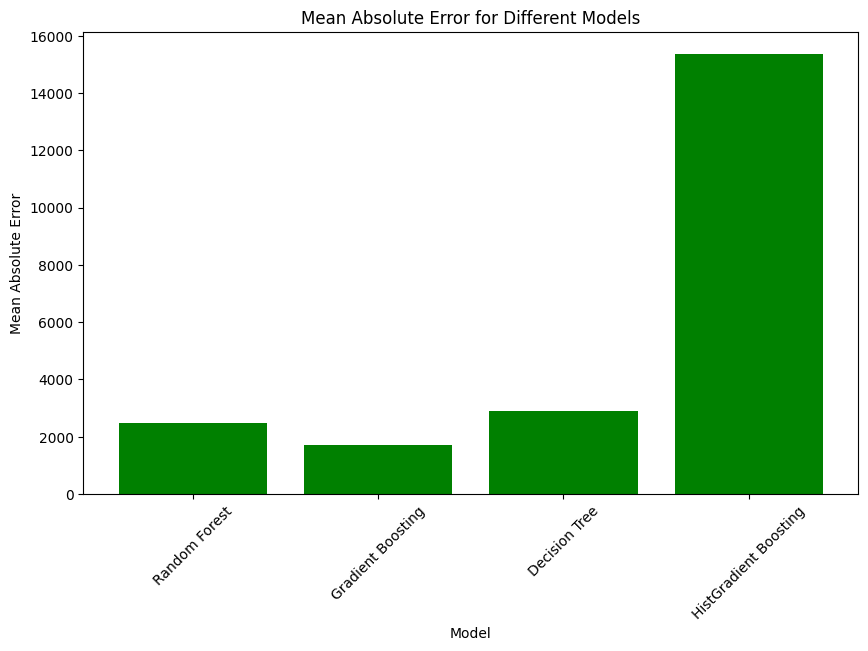

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Define predictors and target
X = df_encoded.drop(columns=['PRICE'])
y = df_encoded['PRICE']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KFold cross-validation object
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the hyperparameters grid for each algorithm
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 4, 5]}
param_grid_dt = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}
param_grid_hist = {'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 4, 5], 'min_samples_leaf': [10, 20, 30]}

# Train and evaluate a Linear Regression Model
print("Linear Regression:")
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_pred = linear_model.predict(X_test_scaled)
print("r2_score is:", r2_score(y_test, linear_pred))
print("mse is:", mean_squared_error(y_test, linear_pred))
print("mae is:", mean_absolute_error(y_test, linear_pred))
print("---------------------------")

# Perform cross-validation and hyperparameter tuning for each algorithm
models = {
    'Random Forest': (RandomForestRegressor(random_state=42), param_grid_rf),
    'Gradient Boosting': (GradientBoostingRegressor(random_state=42), param_grid_gb),
    'Decision Tree': (DecisionTreeRegressor(random_state=42), param_grid_dt),
    'HistGradient Boosting': (HistGradientBoostingRegressor(random_state=42), param_grid_hist)
}

r2_scores = []
mse_scores = []
mae_scores = []

for model_name, (model, param_grid) in models.items():
    print(model_name + ":")
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='r2')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test_scaled)

    # Evaluation metrics
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)

    print("Best Score:", grid_search.best_score_)
    print("r2_score is:", r2)
    print("mse is:", mse)
    print("mae is:", mae)
    print("---------------------------")

# Plotting R-squared scores
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), r2_scores, color='skyblue')
plt.title('R-squared Score for Different Models')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45)
plt.show()

# Plotting mean squared error (mse)
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), mse_scores, color='orange')
plt.title('Mean Squared Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

# Plotting mean absolute error (mae)
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), mae_scores, color='green')
plt.title('Mean Absolute Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.show()

In [51]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.0 MB/s eta 0:00:00


Linear Regression:
r2_score is: 0.9999894669211138
mse is: 21922349.87992367
mae is: 374.94754782943437
---------------------------
Random Forest:
Best Score: 0.999933360540302
r2_score is: 0.9999297196013208
mse is: 146273611.5607828
mae is: 2488.587673763953
---------------------------


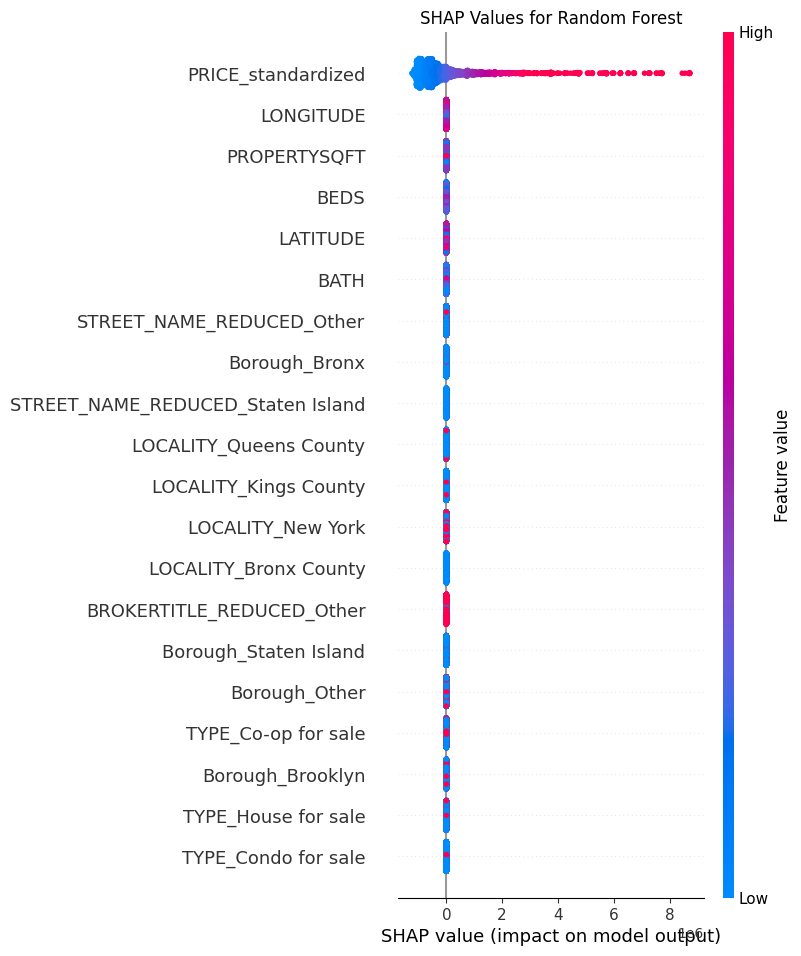

Gradient Boosting:
Best Score: 0.9999503827507237
r2_score is: 0.9999743582067939
mse is: 53367905.840446256
mae is: 1709.9998957167797
---------------------------


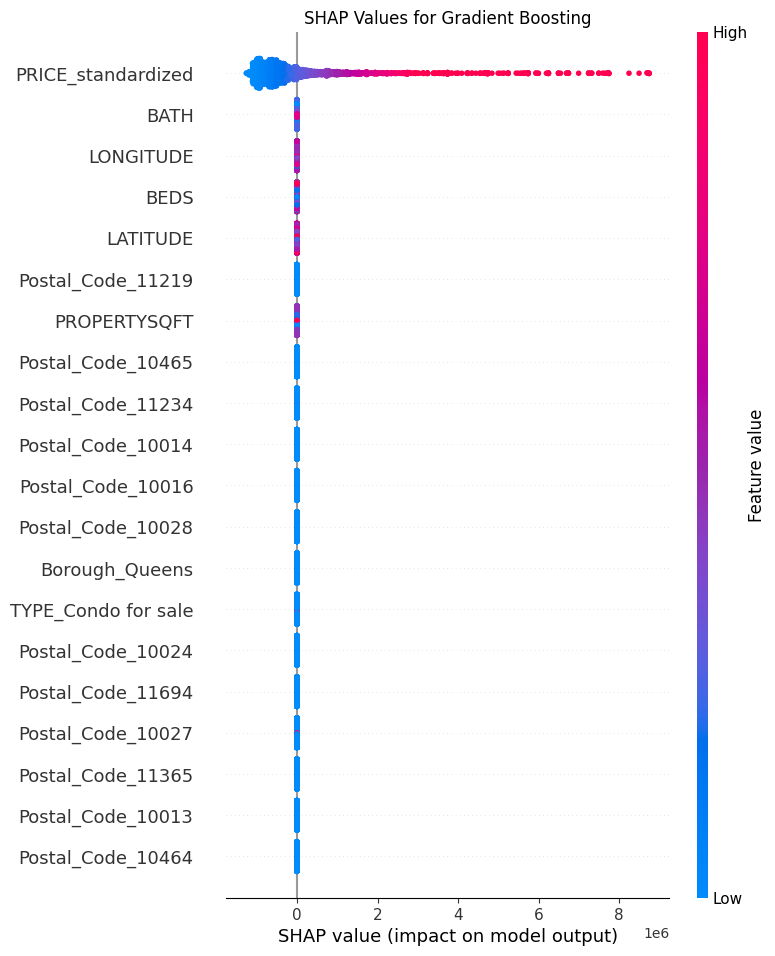

Decision Tree:
Best Score: 0.9999013227116699
r2_score is: 0.999889479979992
mse is: 230023773.0598422
mae is: 2909.179222357232
---------------------------


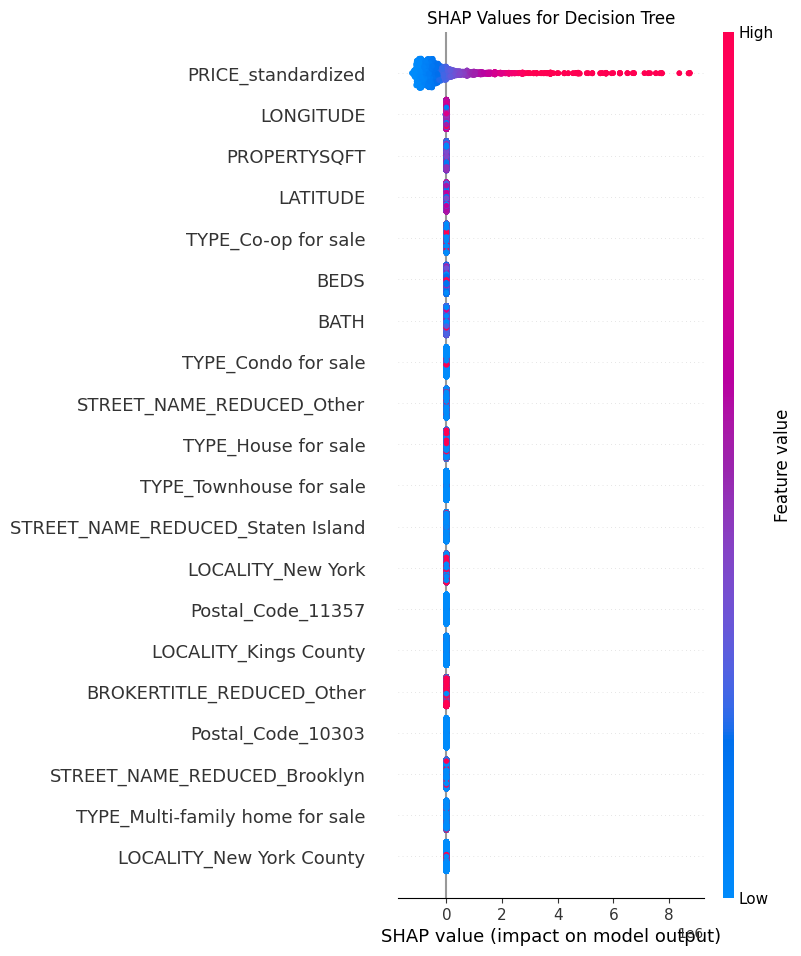

HistGradient Boosting:
Best Score: 0.998965586680273
r2_score is: 0.9990238040533536
mse is: 2031742980.837236
mae is: 15366.068363230464
---------------------------


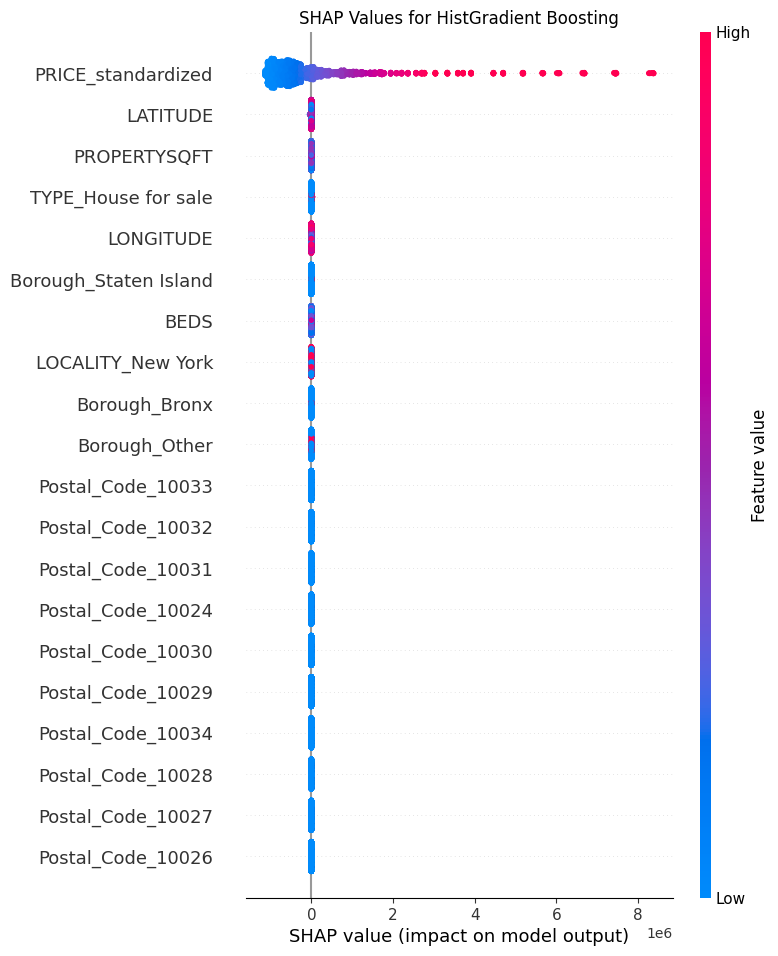

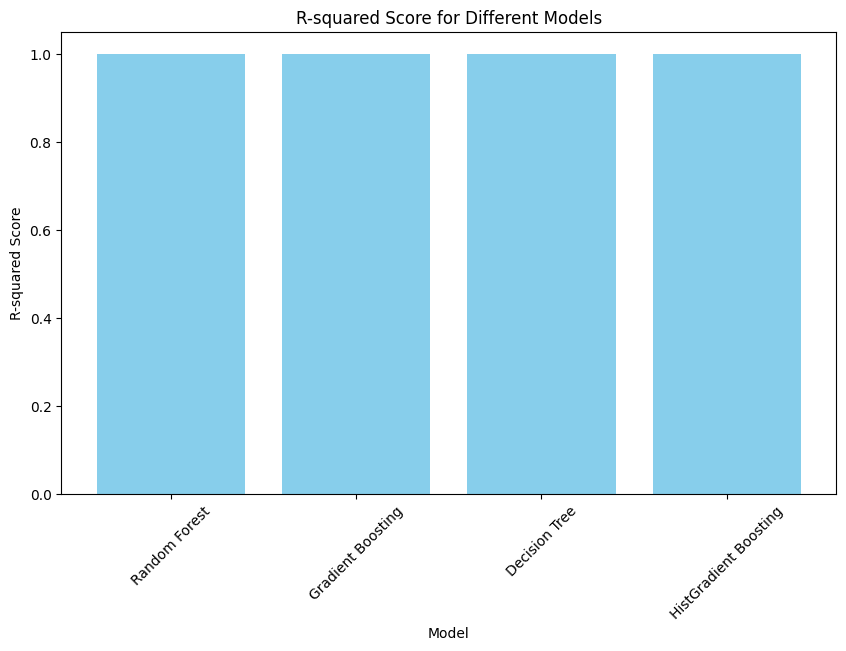

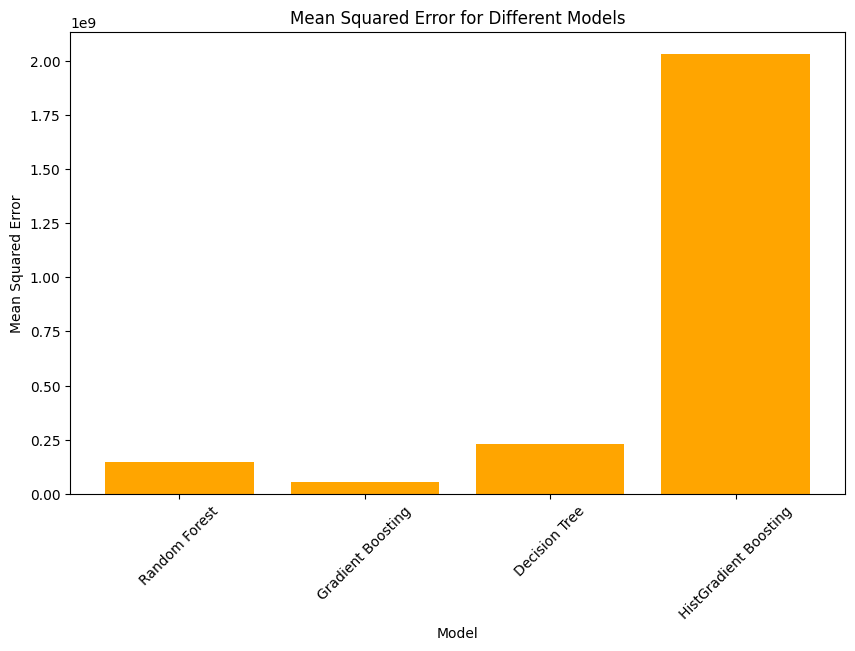

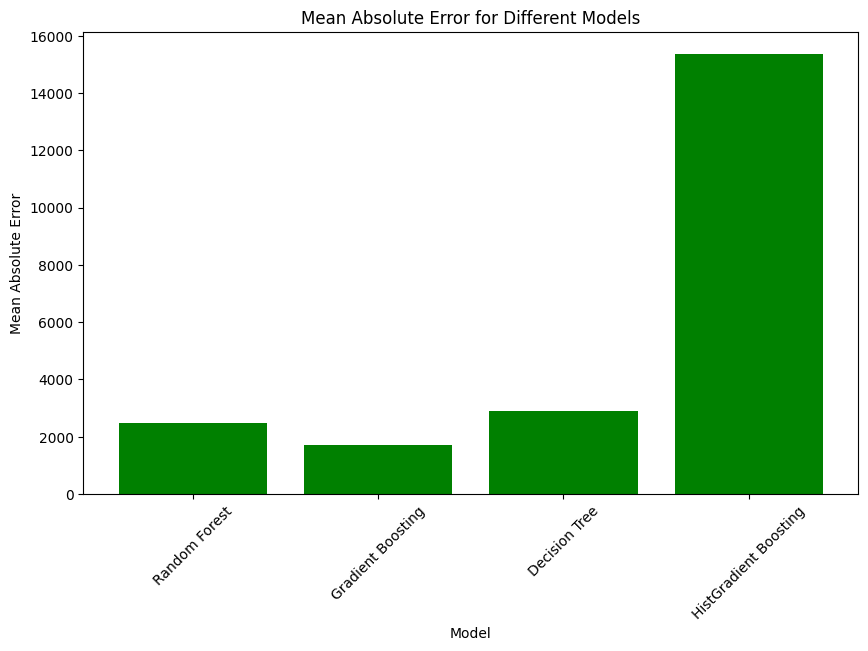

In [71]:
import shap

# Define predictors and target
X = df_encoded.drop(columns=['PRICE'])
y = df_encoded['PRICE']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KFold cross-validation object
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the hyperparameters grid for each algorithm
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 4, 5]}
param_grid_dt = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}
param_grid_hist = {'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 4, 5], 'min_samples_leaf': [10, 20, 30]}

# Train and evaluate a Linear Regression Model
print("Linear Regression:")
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_pred = linear_model.predict(X_test_scaled)
print("r2_score is:", r2_score(y_test, linear_pred))
print("mse is:", mean_squared_error(y_test, linear_pred))
print("mae is:", mean_absolute_error(y_test, linear_pred))
print("---------------------------")

# Perform cross-validation and hyperparameter tuning for each algorithm
models = {
    'Random Forest': (RandomForestRegressor(random_state=42), param_grid_rf),
    'Gradient Boosting': (GradientBoostingRegressor(random_state=42), param_grid_gb),
    'Decision Tree': (DecisionTreeRegressor(random_state=42), param_grid_dt),
    'HistGradient Boosting': (HistGradientBoostingRegressor(random_state=42), param_grid_hist)
}

r2_scores = []
mse_scores = []
mae_scores = []

for model_name, (model, param_grid) in models.items():
    print(model_name + ":")
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='r2')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test_scaled)

    # Evaluation metrics
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)

    print("Best Score:", grid_search.best_score_)
    print("r2_score is:", r2)
    print("mse is:", mse)
    print("mae is:", mae)
    print("---------------------------")

    # Calculate SHAP values
    explainer = shap.Explainer(best_model)
    shap_values = explainer.shap_values(X_train_scaled)

    # Plot SHAP values
    shap.summary_plot(shap_values, X_train, show=False)
    plt.title(f"SHAP Values for {model_name}")
    plt.show()

# Plotting R-squared scores
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), r2_scores, color='skyblue')
plt.title('R-squared Score for Different Models')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45)
plt.show()

# Plotting mean squared error (mse)
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), mse_scores, color='orange')
plt.title('Mean Squared Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

# Plotting mean absolute error (mae)
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), mae_scores, color='green')
plt.title('Mean Absolute Error for Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.show()


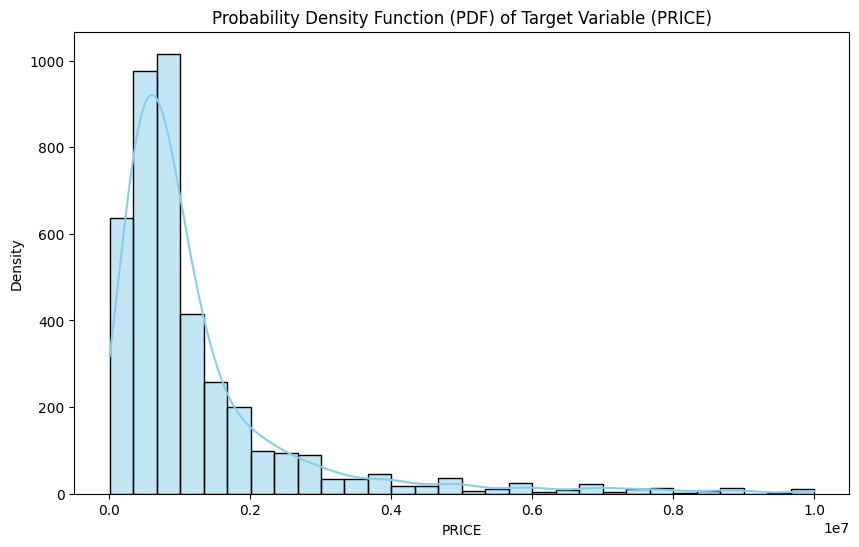

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Probability Density Function (PDF) using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['PRICE'], kde=True, color='skyblue', bins=30)
plt.title('Probability Density Function (PDF) of Target Variable (PRICE)')
plt.xlabel('PRICE')
plt.ylabel('Density')
plt.show()


Evaluation metrics for DecisionTreeRegressor


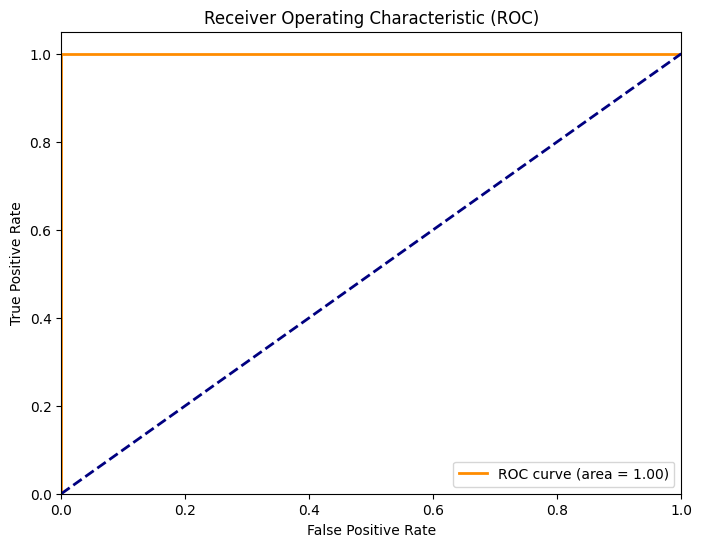

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Function to calculate AUC and plot ROC curve
def calculate_auc_and_plot_roc(model):
    print("Evaluation metrics for", model.__class__.__name__)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Convert regression problem into binary classification
    threshold = 300000  # Example threshold, adjust as needed
    y_pred_binary = (y_pred >= threshold).astype(int)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test >= threshold, y_pred_binary)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Train and evaluate Decision Tree
calculate_auc_and_plot_roc(DecisionTreeRegressor(random_state=42, max_depth= None, min_samples_leaf = 1, min_samples_split =5))

In [74]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

print("Linear Regression Coefficients:", linear_model.coef_)



Linear Regression Coefficients: [ 8.59363372e-11  0.00000000e+00 -4.65661287e-10 -4.07453626e-10
  5.52972779e-10  1.45643751e+06 -3.70357557e+04 -1.97280815e+03
 -3.11632896e+04 -2.78912312e+03 -1.09691370e+04 -5.21002339e+03
 -4.40596164e+03 -3.24614235e+04 -8.55205108e+03 -1.39519820e+03
 -2.88034528e+04 -1.72160207e+04 -1.80100906e+04  4.30348118e+03
  9.39051183e+02 -6.68655505e+03  6.63823357e+03  1.09998499e+04
  2.30311604e+04  8.57363072e+02  7.21570690e+03  2.38205718e+03
  7.66965591e+02  1.94882754e+03 -1.36116151e+04 -2.78627436e+04
 -1.19930888e+04 -1.36116151e+04 -1.08986656e+04 -1.24468338e+04
 -9.52777314e+03 -9.22805867e+03 -9.95979354e+03 -1.06392837e+04
 -4.00373045e+04 -8.48666490e+03 -4.81326844e+03 -3.05443658e+04
 -4.28094390e+04 -6.36153095e+03 -4.50308643e+03 -7.40529990e+03
 -4.57938585e+03 -1.42008444e+04 -6.79868577e+03 -2.29552997e+04
 -2.90541428e+04 -1.18375689e+04 -2.62254612e+04 -4.62449379e+04
 -1.47749189e+04 -6.58430672e+03 -3.10564909e+04 -2.597056

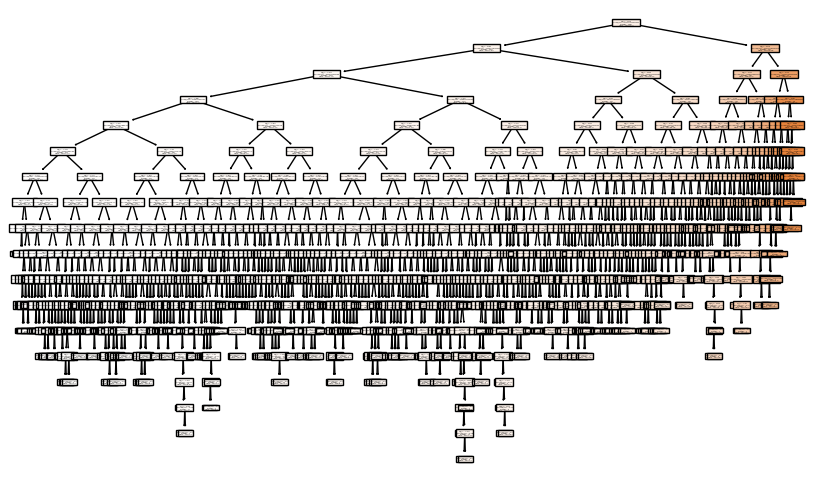

In [78]:
# Decision Trees

tree_model = DecisionTreeRegressor(random_state=42, max_depth= None, min_samples_leaf = 1, min_samples_split =5)
tree_model.fit(X_train_scaled, y_train)

# Plot decision tree
plt.figure(figsize=(10, 6))
plot_tree(tree_model, filled=True)
plt.show()